# Acquire

**Goal: Your goal is to predict the values of single unit properties using the obervations from 2017.**

**import**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from sklearn.model_selection import train_test_split

sys.path.append("./util_")
import acquire_
import prepare_


**get data**

In [51]:
# sql query
query = """
SELECT bedroomcnt, 
		bathroomcnt,
        calculatedfinishedsquarefeet,
        taxvaluedollarcnt,
        yearbuilt,
        taxamount,
        fips
FROM properties_2017
WHERE propertylandusetypeid = 261 -- Single family home
"""

# UNION

# SELECT bedroomcnt, 
# 		bathroomcnt,
#         calculatedfinishedsquarefeet,
#         taxvaluedollarcnt,
#         yearbuilt,
#         taxamount,
#         fips
# FROM properties_2017
# WHERE propertylandusetypeid = 261 -- Single family home;
# """

In [52]:
# get data from codeup database
zillow, q = acquire_.get_codeup_sql_data_(db_name="zillow", query=query,fileName="zillow_single_family")

## Understand data

In [53]:
zillow.shape

(2152863, 7)

In [54]:
zillow.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [71]:
zillow.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [56]:
zillow.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [57]:
# count of numeric columns and object columns
numerics = len(zillow.select_dtypes("number").columns)
objects = len(zillow.select_dtypes("object").columns)

print("Numeric col count:", numerics)
print("object col count:", objects)

Numeric col count: 7
object col count: 0


**What I see:**

- I have 2152863 rows and 7 columns
- 7 of the 29 columns are numric while 0 of them are string object colums
- I have unsure null values in my data
- I also see the descriptive statistics of my data

# Prepare

In [58]:
zillow.T

,0,1,2,3,4,5,6,7,8,9,...,2152853,2152854,2152855,2152856,2152857,2152858,2152859,2152860,2152861,2152862
bedroomcnt,0.0,0.0,0.0,0.00,4.00,0.0,3.00,3.00,0.00,0.00,...,4.00,0.0,3.0,4.00,0.00,4.00,4.00,0.00,3.0,4.0
bathroomcnt,0.0,0.0,0.0,0.00,2.00,0.0,4.00,2.00,0.00,0.00,...,2.00,0.0,2.5,4.00,0.00,3.00,4.50,0.00,2.5,4.0
calculatedfinishedsquarefeet,NaN,NaN,NaN,NaN,3633.00,NaN,1620.00,2077.00,NaN,NaN,...,1987.00,NaN,1809.0,4375.00,NaN,2262.00,3127.00,NaN,1974.0,2110.0
taxvaluedollarcnt,27516.0,10.0,10.0,2108.00,296425.00,124.0,847770.00,646760.00,6730242.00,15532.00,...,259913.00,1198476.0,405547.0,422400.00,1087111.00,960756.00,536061.00,208057.00,424353.0,554009.0
yearbuilt,NaN,NaN,NaN,NaN,2005.00,NaN,2011.00,1926.00,NaN,NaN,...,1955.00,NaN,2012.0,2015.00,NaN,2015.00,2014.00,NaN,2015.0,2014.0
taxamount,NaN,NaN,NaN,174.21,6941.39,NaN,10244.94,7924.68,80348.13,248.89,...,3175.66,NaN,4181.1,13877.56,19313.08,13494.52,6244.16,5783.88,5302.7,6761.2
fips,6037.0,6037.0,6037.0,6037.00,6037.00,6037.0,6037.00,6037.00,6037.00,6037.00,...,6059.00,6037.0,6059.0,6037.00,6059.00,6059.00,6059.00,6059.00,6059.0,6037.0


**drop nulls**

In [74]:
# drop all nulls in the dataframe
zillow = zillow.dropna()

In [79]:
# convert data type from float to int
zillow.bedroomcnt = zillow.bedroomcnt.astype(int)
zillow.yearbuilt = zillow.yearbuilt.astype(int)

**Plot**

BEDROOMCNT
3     962944
4     633608
2     334221
5     150671
6      25117
1      22895
7       4792
0       4397
8       1103
9        290
10       118
11        34
13        15
12        12
14         7
15         5
18         3
16         2
25         1
Name: bedroomcnt, dtype: int64
3     4.499244e-01
4     2.960460e-01
2     1.561609e-01
5     7.039928e-02
6     1.173563e-02
1     1.069742e-02
7     2.239006e-03
0     2.054447e-03
8     5.153640e-04
9     1.354991e-04
10    5.513413e-05
11    1.588611e-05
13    7.008576e-06
12    5.606861e-06
14    3.270669e-06
15    2.336192e-06
18    1.401715e-06
16    9.344768e-07
25    4.672384e-07
Name: bedroomcnt, dtype: float64


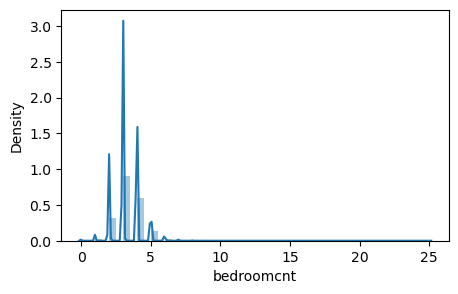

BATHROOMCNT
2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64
2.00     4.403549e-01
3.00     1.973606e-01
1.00     1.927742e-01
2.50     6.673426e-02
4.00     3.833177e-02
1.50     1.455775e-02
3.50     1.329947e-02
5.00     1.322565e-02
4.50     9.099001e-03
6.00     5.007394e-03
5.50     2.897345e-03
7.00     2.046971e-03
0.00     1.996977e-03
8.00     7.854278e-04
6.50     6.214271e-04
9.00     3.303376e

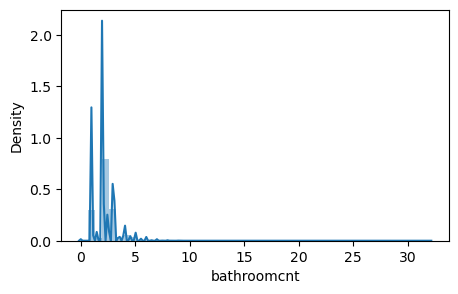

CALCULATEDFINISHEDSQUAREFEET
1200.0     5184
1080.0     4376
1120.0     4354
1400.0     3828
1440.0     3684
           ... 
10180.0       1
13169.0       1
9095.0        1
10525.0       1
24920.0       1
Name: calculatedfinishedsquarefeet, Length: 10557, dtype: int64
1200.0     2.422164e-03
1080.0     2.044635e-03
1120.0     2.034356e-03
1400.0     1.788589e-03
1440.0     1.721306e-03
               ...     
10180.0    4.672384e-07
13169.0    4.672384e-07
9095.0     4.672384e-07
10525.0    4.672384e-07
24920.0    4.672384e-07
Name: calculatedfinishedsquarefeet, Length: 10557, dtype: float64


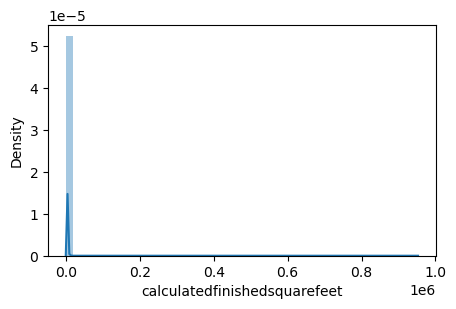

TAXVALUEDOLLARCNT
450000.0    820
500000.0    774
400000.0    723
430000.0    690
440000.0    683
           ... 
729523.0      1
940139.0      1
545367.0      1
38804.0       1
536061.0      1
Name: taxvaluedollarcnt, Length: 588178, dtype: int64
450000.0    3.831355e-04
500000.0    3.616425e-04
400000.0    3.378134e-04
430000.0    3.223945e-04
440000.0    3.191238e-04
                ...     
729523.0    4.672384e-07
940139.0    4.672384e-07
545367.0    4.672384e-07
38804.0     4.672384e-07
536061.0    4.672384e-07
Name: taxvaluedollarcnt, Length: 588178, dtype: float64


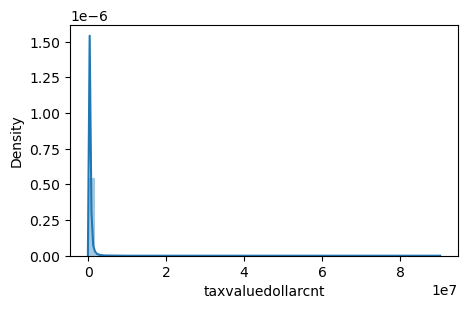

YEARBUILT
1955    84329
1950    71606
1954    69069
1953    62270
1956    61858
        ...  
1855        1
1879        1
1833        1
1840        1
1874        1
Name: yearbuilt, Length: 153, dtype: int64
1955    3.940175e-02
1950    3.345707e-02
1954    3.227169e-02
1953    2.909494e-02
1956    2.890243e-02
            ...     
1855    4.672384e-07
1879    4.672384e-07
1833    4.672384e-07
1840    4.672384e-07
1874    4.672384e-07
Name: yearbuilt, Length: 153, dtype: float64


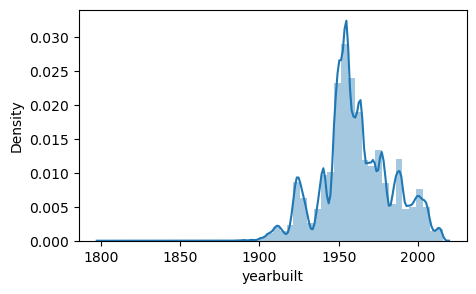

TAXAMOUNT
345.72      172
344.18       76
343.52       74
49.18        46
388.18       37
           ... 
8191.38       1
11627.92      1
15008.68      1
9227.22       1
13494.52      1
Name: taxamount, Length: 915868, dtype: int64
345.72      8.036501e-05
344.18      3.551012e-05
343.52      3.457564e-05
49.18       2.149297e-05
388.18      1.728782e-05
                ...     
8191.38     4.672384e-07
11627.92    4.672384e-07
15008.68    4.672384e-07
9227.22     4.672384e-07
13494.52    4.672384e-07
Name: taxamount, Length: 915868, dtype: float64


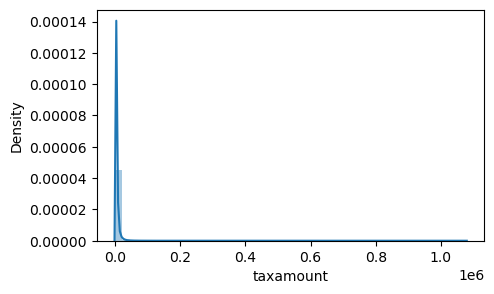

FIPS
6037.0    1425207
6059.0     552057
6111.0     162971
Name: fips, dtype: int64
6037.0    0.665911
6059.0    0.257942
6111.0    0.076146
Name: fips, dtype: float64


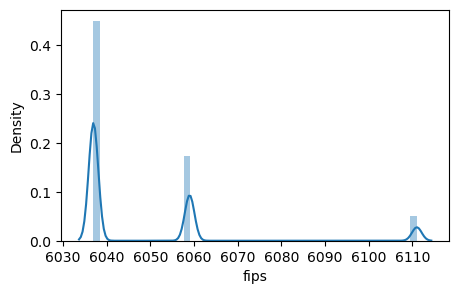

In [88]:
# plot distributions
for i in zillow.columns:
    print(i.upper())
    print(zillow[i].value_counts())
    print(zillow[i].value_counts(normalize=True))
    
    plt.figure(figsize=(5,3))
    sns.distplot(zillow[i])
    plt.show()

## Split

In [94]:
# split the data into training, validation and testing sets
train, validate, test = prepare_.split_data_(df=zillow,
                    test_size=0.2, 
                     validate_size=0.2, 
                     random_state=95)
(train.shape, validate.shape, test.shape)

((1284141, 7), (428047, 7), (428047, 7))